<a href="https://colab.research.google.com/github/Joaogmr472/RELAMPAGOS_SUDESTE/blob/main/C%C3%B3digo_2_PLOTA_FIGURAS_PICO_ANUAL_MENSAL_SAZONAL_ENTLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REDE EART NETWORK TOTAL LIGHTNING NETWORKS**

**PLOTA FIGURAS DE PICO DE CORRENTE REDE ENTLN 2015-2020 PARA O SUDESTE DO BRASIL**
**SCRIPT I**
---
**OBJETIVO:** Este Google Colab plota mapas **anual**, **mensal** e **sazonal** para o Sudeste de Pico de Corrente das descargas de retorno da rede ENTLN.

**DADOS DE ENTRADA**: Dados de Descargas de Retorno da rede em superfície ENTLN. 
Dados de acumulados diários de pico de corrente.
---
**DADOS DE SAÍDA:**
1.   Mapa **anual** de Pico de Corrente. 
2.   Mapa **mensal** de Pico de Corrente. 
3.   Mapa **sazonal** de Pico de Corrente. 
---
**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Importação das bibliotecas
3.   Monta o drive da pessoa
4.   Acessa os dados através do Drive
5.   Processa os dados
6.   Gera as Figuras

*   PLOTA FIGURA DE MÉDIA ANUAL DE PICO DE CORRENTE MÉDIO (2015-2020) POR TIPO (NS+, NS-)
*   PLOTA FIGURA DE MÉDIA SAZONAL DE PICO DE CORRENTE MÉDIO (2015-2020) POR TIPO
*   PLOTA FIGURA DE MÉDIA MENSAL DE PICO DE CORRENTE MÉDIO (2015-2020)
---
**OBSERVAÇÕES IMPORTANTES**: 
1. Mudar o caminho para seu drive. Veja em: **###MUDANÇAS AQUI####**
---
***Realizado por: [João G M Ribeiro](https://github.com/Joaogmr472/) e [Enrique V Mattos](https://github.com/evmpython) - 09/mar/2022*** 
NESSE SCRIPT:




# **########## MUDANÇAS AQUI ##########**

CAMINHO DOS DADOS DIÁRIOS

In [1]:
path = f'/content/drive/MyDrive/JOAO_GABRIEL_MESTRADO/MESTRADO/DADOS/'
path_dados = f'{path}ACUMULADOS_DIARIOS/'

CAMINHO DAS PALETAS DE CORES E SHAPEFILES

In [2]:
path_cmap = f'{path}CPT_colors/'
path_shp_reg = f'{path}SHAPEFILES/regioes_2010/'
path_shp_estados = f'{path}SHAPEFILES/br_unidades_da_federacao/'

PASTA DE SAÍDA DAS FIGURAS

In [3]:
output = f'/content/drive/MyDrive/PYTHON/GITHUB/FIGURAS_RELAMPAGOS/'

#**INSTALAÇÃO DAS BIBLIOTECAS**

In [4]:
# Instalando o cartopy (usado para gerar Mapas)
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy

# Instalando o proplot (usado para gerar Mapas também)
!pip install proplot==0.6.4

# Intalando pacote para mascarar shapefile
!pip install salem
!pip install geopandas
!pip install pyproj
!pip install rasterio


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (635 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155332 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state 

# **Download de informações auxiliares**


In [5]:
# Baixa paleta de cores
!wget -c https://www.dropbox.com/s/t7b8x2i3gnsq8gv/cpt_convert.py 

# Baixando os arquivos de shapefile dos estados do Sudeste
!wget -q -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/MG/mg_unidades_da_federacao.zip
!wget -q -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/ES/es_unidades_da_federacao.zip
!wget -q -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/RJ/rj_unidades_da_federacao.zip
!wget -q -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/SP/sp_unidades_da_federacao.zip

!unzip -o /content/mg_unidades_da_federacao.zip
!unzip -o /content/es_unidades_da_federacao.zip
!unzip -o /content/rj_unidades_da_federacao.zip
!unzip -o /content/sp_unidades_da_federacao.zip

--2022-03-09 17:24:29--  https://www.dropbox.com/s/t7b8x2i3gnsq8gv/cpt_convert.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t7b8x2i3gnsq8gv/cpt_convert.py [following]
--2022-03-09 17:24:29--  https://www.dropbox.com/s/raw/t7b8x2i3gnsq8gv/cpt_convert.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc777f49c9d401678a92f43fd1e8.dl.dropboxusercontent.com/cd/0/inline/BhKmKAubfnbELQMA3CjELftDQfbRRFq_mK5LPGxfba2-JUO9_y1oYVOwifJSegXnV8-ZdjYnwJsUhyCwfpF8pj2B5PRqgpKIkPWoBAptrpH7LhiGUayWjoGvVaxSBcFsRyKLNWaLYctb6ohl135cuG_0MsTcwqc2xoUT16BXj2ER3w/file# [following]
--2022-03-09 17:24:29--  https://uc777f49c9d401678a92f43fd1e8.dl.dropboxusercontent.com/cd/0/inline/BhKmKAubfnbELQMA3CjELftDQfbRRFq_mK5LPGxfba2-JUO9_y1oYVOwifJ

#**IMPORTA AS BIBLIOTECAS**

In [6]:
##############################################
import matplotlib
matplotlib.rcParams.update({'font.size':22})
from matplotlib import pyplot as plt
from cpt_convert import loadCPT # Importando a função CPT convert 
from matplotlib.colors import LinearSegmentedColormap # interpolação linear para as cores dos mapas
##############################################
import proplot as plot
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
##############################################
import numpy as np
import glob
##############################################
import salem
import xarray as xr
import pandas as pd
import calendar
##############################################
import warnings
warnings.filterwarnings('ignore')
##############################################
# acessando o drive
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
##############################################

/usr/local/lib/python3.7/dist-packages/proplot/config.py:1454: ProPlotWarning: Rebuilding font cache.


Mounted at /content/drive


# **Importa funções**

In [7]:
#----------------------------------------------------------------------------------- 
# Função que plota por Estado 
#----------------------------------------------------------------------------------- 
def evm_plot_by_state():
    shapefile = list(shpreader.Reader('/content/ES_UF_2019.shp').geometries()) ; ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.7)   
    shapefile = list(shpreader.Reader('/content/MG_UF_2019.shp').geometries()) ; ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.7)   
    shapefile = list(shpreader.Reader('/content/RJ_UF_2019.shp').geometries()) ; ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.7)   
    shapefile = list(shpreader.Reader('/content/SP_UF_2019.shp').geometries()) ; ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.7)   
    

#**LÊ O SHAPEFILE**


In [8]:
# Abrindo o arquivo shapefile
shp = salem.read_shapefile(f'{path_shp_reg}regioes_2010.shp')
shp_sudeste = shp.loc[shp['nome'] == 'Sudeste']  # remover as outras regiões

#**CARREGA A FUNÇÃO DE COLORMAP**

In [9]:
# Converte o arquivo cpt a ser usado no python
cpt_corr = loadCPT(f'{path_cmap}PICO_CORR.cpt')

#Fazendo uma interpolação linear com o arquivo cpt
cpt_convert_corr = LinearSegmentedColormap('cpt_corr', cpt_corr)

#**SELECIONA OS LIMITES DA REGIÃO SUDESTE DO BRASIL**

In [10]:
latN = -14.0
latS = -26.0
lonW = -53.50
lonE = -39.50

#**Abre os Arquivos NETCDF**

1.   cg_pos: NUVEM-SOLO POSITIVO (NS+)

2.   cg_neg: NUVEM-SOLO NEGATIVO (NS-)

In [30]:
cg_pos = xr.open_mfdataset(f'{path_dados}+CG/*.nc', concat_dim='time', combine='nested')
cg_neg = xr.open_mfdataset(f'{path_dados}-CG/*.nc', concat_dim='time', combine='nested')

#**Processa os dados de relâmpagos**


**FAZ O ACUMULADO ANUAL, SAZONAL E MENSAL DE RELÂMPAGOS POR TIPO**

## **RELÂMPAGOS NUVEM-SOLO POSITIVO (NS+)**

normaliza a variável **pico de corrente**

In [31]:
picop = cg_pos['pc'] / cg_pos['flash']

média **anual** do pico de corrente médio

In [32]:
raios_cg_pos_ano = picop.resample(time='1Y').mean(dim='time').mean(dim='time')
raios_cg_pos_ano = raios_cg_pos_ano.salem.roi(shape=shp_sudeste)

média **sazonal** do pico de corrente médio

In [33]:
raios_cg_pos_season = picop.resample(time='1M').mean(dim='time').groupby("time.season").mean(dim="time")
raios_cg_pos_season  = raios_cg_pos_season.salem.roi(shape=shp_sudeste)

média **mensal** do pico de corrente médio

In [34]:
raios_cg_pos_mon = picop.resample(time='1M').mean(dim='time').groupby("time.month").mean(dim="time")
raios_cg_pos_mon  = raios_cg_pos_mon.salem.roi(shape=shp_sudeste)

## **RELÂMPAGOS NUVEM-SOLO NEGATIVO (NS-)**

Normaliza a variável de **Pico de Corrente**

In [35]:
picon = cg_neg['pc'] / cg_neg['flash']

média **anual** do pico de corrente médio

In [36]:
raios_cg_neg_ano = picon.resample(time='1Y').mean(dim='time').mean(dim='time')
raios_cg_neg_ano = raios_cg_neg_ano.salem.roi(shape=shp_sudeste)

média **sazonal** do pico de corrente médio

In [37]:
raios_cg_neg_season = picon.resample(time='1M').mean(dim='time').groupby("time.season").mean(dim="time")
raios_cg_neg_season  = raios_cg_neg_season.salem.roi(shape=shp_sudeste)

média **mensal** do pico de corrente médio

In [38]:
raios_cg_neg_mon = picon.resample(time='1M').mean(dim='time').groupby("time.month").mean(dim="time")
raios_cg_neg_mon = raios_cg_neg_mon.salem.roi(shape=shp_sudeste)

#**PLOTA AS FIGURAS**

## **MÉDIA ANUAL DO PICO DE CORRENTE MÉDIO**
PARA NS+ E NS-

In [45]:
# limites das paletas para os plots

bounds = [0,5,10,15,20,25,30,35,40,45]
norm = matplotlib.colors.BoundaryNorm(bounds, cpt_convert_corr.N)

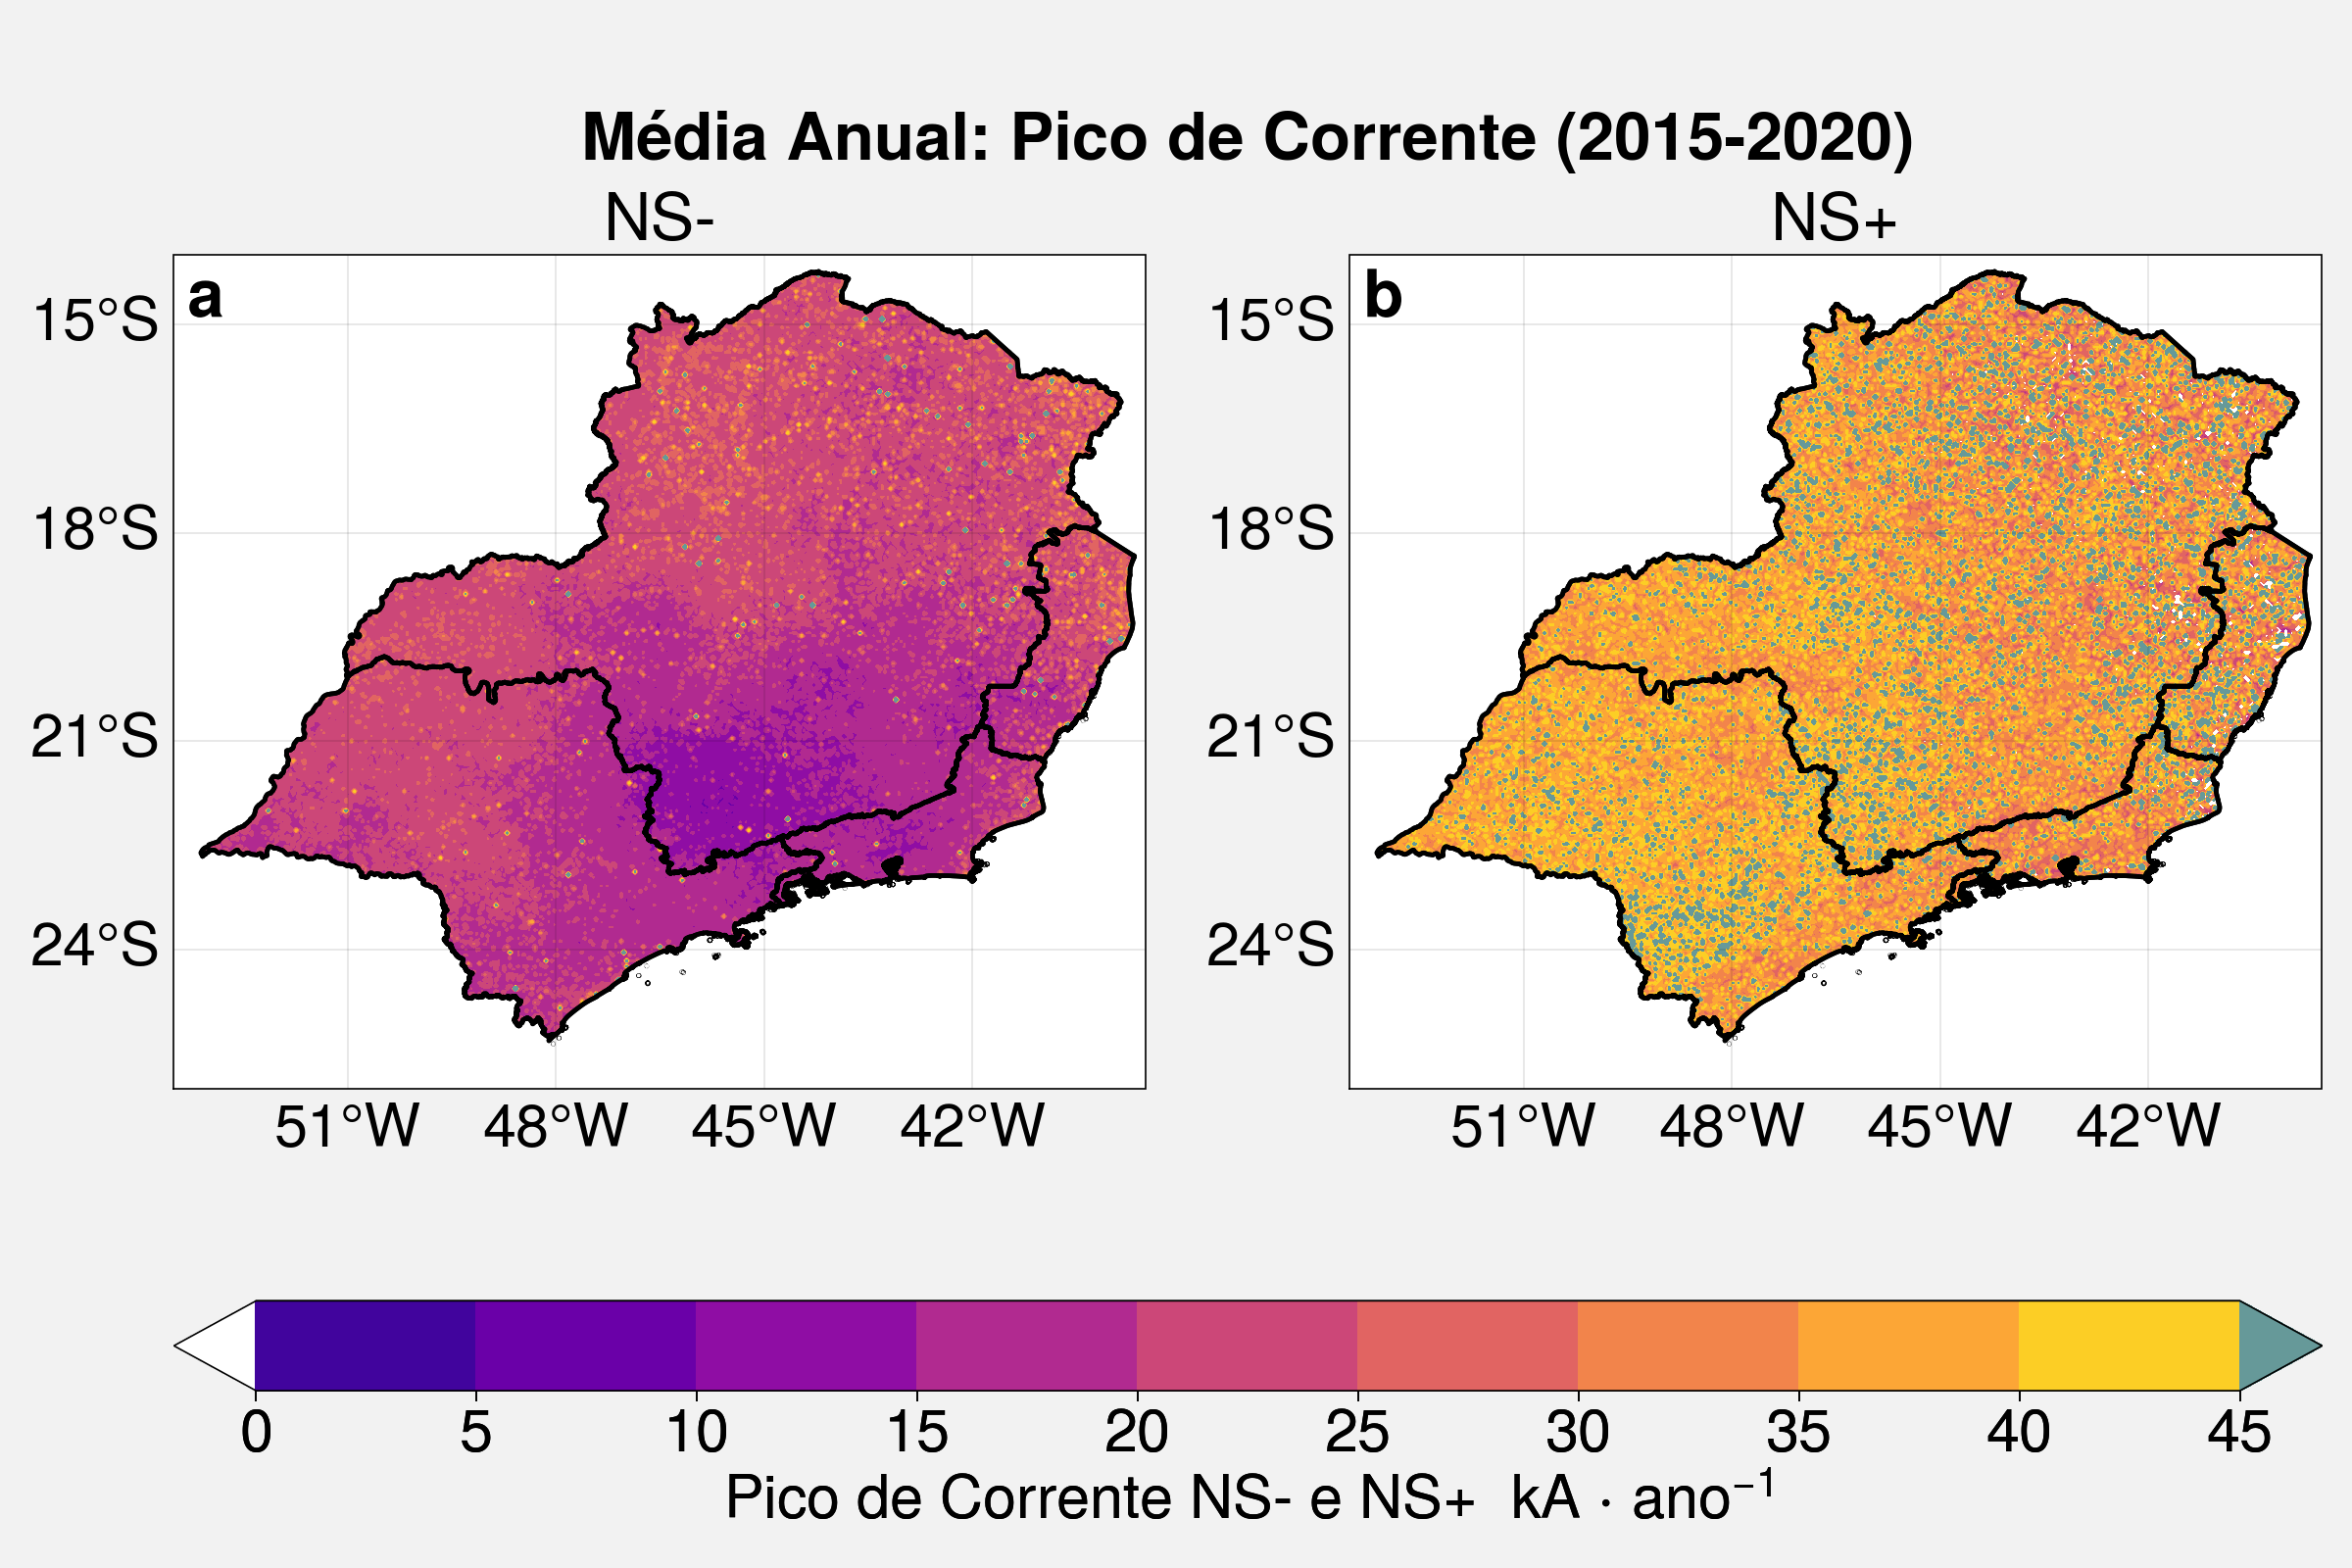

In [46]:
# Plotando a figura

matplotlib.rcParams.update({'font.size':22})   # Seta o tamanho da fonte da figura

# chama a figura
fig, ax = plot.subplots(figsize=(12,8),ncols=2, tight=True, proj='pcarree')

# configurações do plot
ax.format(coast=False, borders=True, innerborders=False, labels=True, latlines=3, lonlines=3,
          latlim=(latN, latS), lonlim=(lonW, lonE), suptitle=f'Média Anual: Pico de Corrente (2015-2020)')

#--------------------------------------------## NS- ##-----------------------------------------------------
ax[0].format(title='NS-',abc = 1, abcloc='ul') # título da figura

# plota a variável
map1 = ax[0].contourf(raios_cg_neg_ano.lon, raios_cg_neg_ano.lat, (raios_cg_neg_ano[:,:]/1000.),
                      cmap=cpt_convert_corr, vmin=0,vmax=45,extend='both')

# plota contornos dos Estados
evm_plot_by_state()

#--------------------------------------------## NS+ ##-----------------------------------------------------
ax[1].format(title='NS+',abc = 1, abcloc='ul') # título da figura

# plota a variável
map3 = ax[1].contourf(raios_cg_pos_ano.lon, raios_cg_pos_ano.lat, (raios_cg_pos_ano[:,:]/1000.),
                     cmap=cpt_convert_corr, vmin=0,vmax=45,extend='both')

# plota contornos dos Estados
evm_plot_by_state()

# plota a barra de cores
cbar = fig.colorbar(map1, loc='b', label='Pico de Corrente NS- e NS+  kA ${\cdot}$ $ano^{-1}$')
cbar.set_ticks([0,5,10,15,20,25,30,35,40,45])

# exibe a figura na tela
plot.show() 

# salva a figura
fig.savefig(f'{output}pc_clima_anual_2015-2020.png', dpi=300)

## **MÉDIA SAZONAL DO PICO DE CORRENTE**

**RELÂMPAGOS NS+**

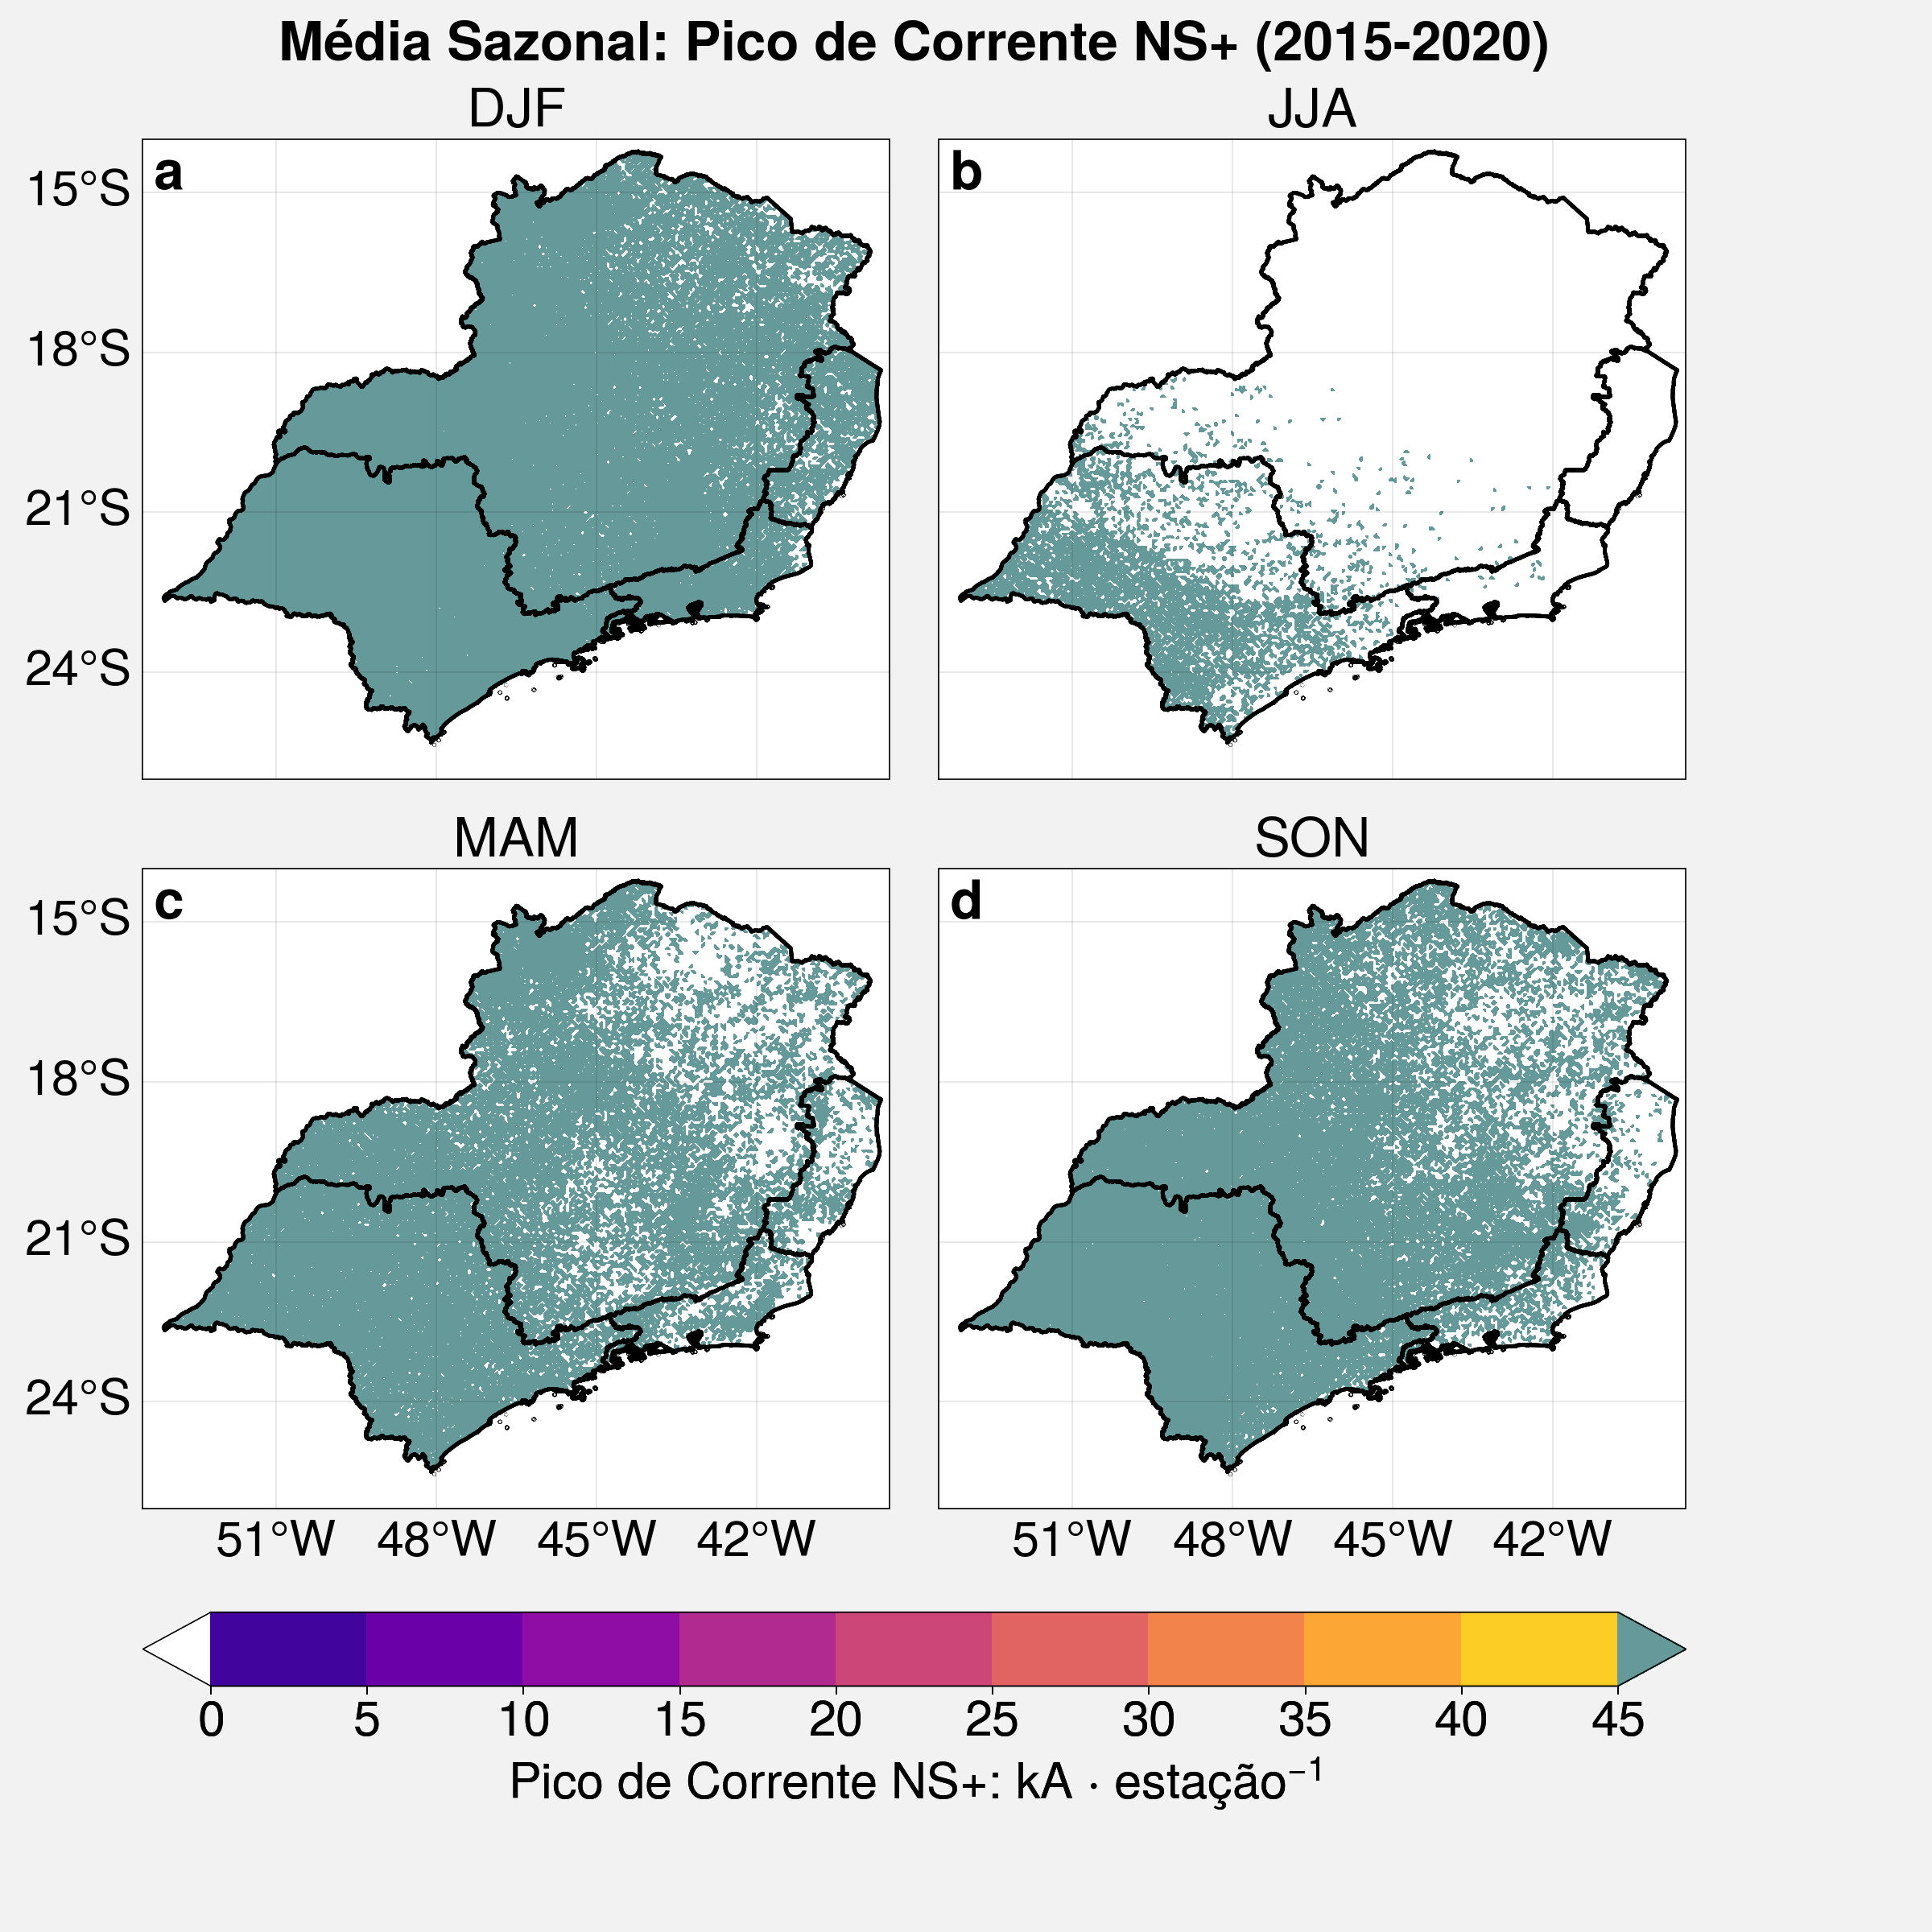

In [47]:
# Plotando a figura
matplotlib.rcParams.update({'font.size':22})  # seta o tamanho da fonte

# chama a figura
fig, ax = plot.subplots(figsize=(12,12), nrows=2, ncols=2, bottom='5em', right='5em',
                        sharex = False, sharey = False, proj='pcarree')
  
# configuração do plot
ax.format(coast=False, borders=True, innerborders=False, latlines=3, lonlines=3,
          latlim=(latN, latS), lonlim=(lonW, lonE), suptitle=f'Média Sazonal: Pico de Corrente NS+ (2015-2020)')

## looping nas estações do nao
for s in range(len(raios_cg_pos_season)):

    # plota a variável em cada estação do ano
    map1 = ax[s].contourf(raios_cg_pos_season.lon, raios_cg_pos_season.lat, raios_cg_pos_season[s,:,:],
                          cmap=cpt_convert_corr, vmax = 45,vmin = 0, extend='both')
    
    # titulo da figura
    ax[s].format(title=raios_cg_pos_season.season[s].values,abc = 1, abcloc='ul')
    
    # molda as lebels de lat e lon
    if(s == 0):ax[s].format(labels = [True, False, False, False])
    if(s == 1):ax[s].format(labels = [False, False, False, False])
    if(s == 2):ax[s].format(labels = [True, False, True, False])
    if(s == 3):ax[s].format(labels = [False, False, True, False])

    # plota contornos dos Estados
    evm_plot_by_state()

# plota a barra de cores
cbar = fig.colorbar(map1, loc='b',label= 'Pico de Corrente NS+: kA ${\cdot}$ $estação^{-1}$')
cbar.set_ticks([0,5,10,15,20,25,30,35,40,45])

# mostra  figura na tela
plot.show()

# salva a figura
fig.savefig(f'{output}ns_pos_pc_media_sazonal_2015-2020.png', dpi=300)


**RELÂMPAGOS NS-**

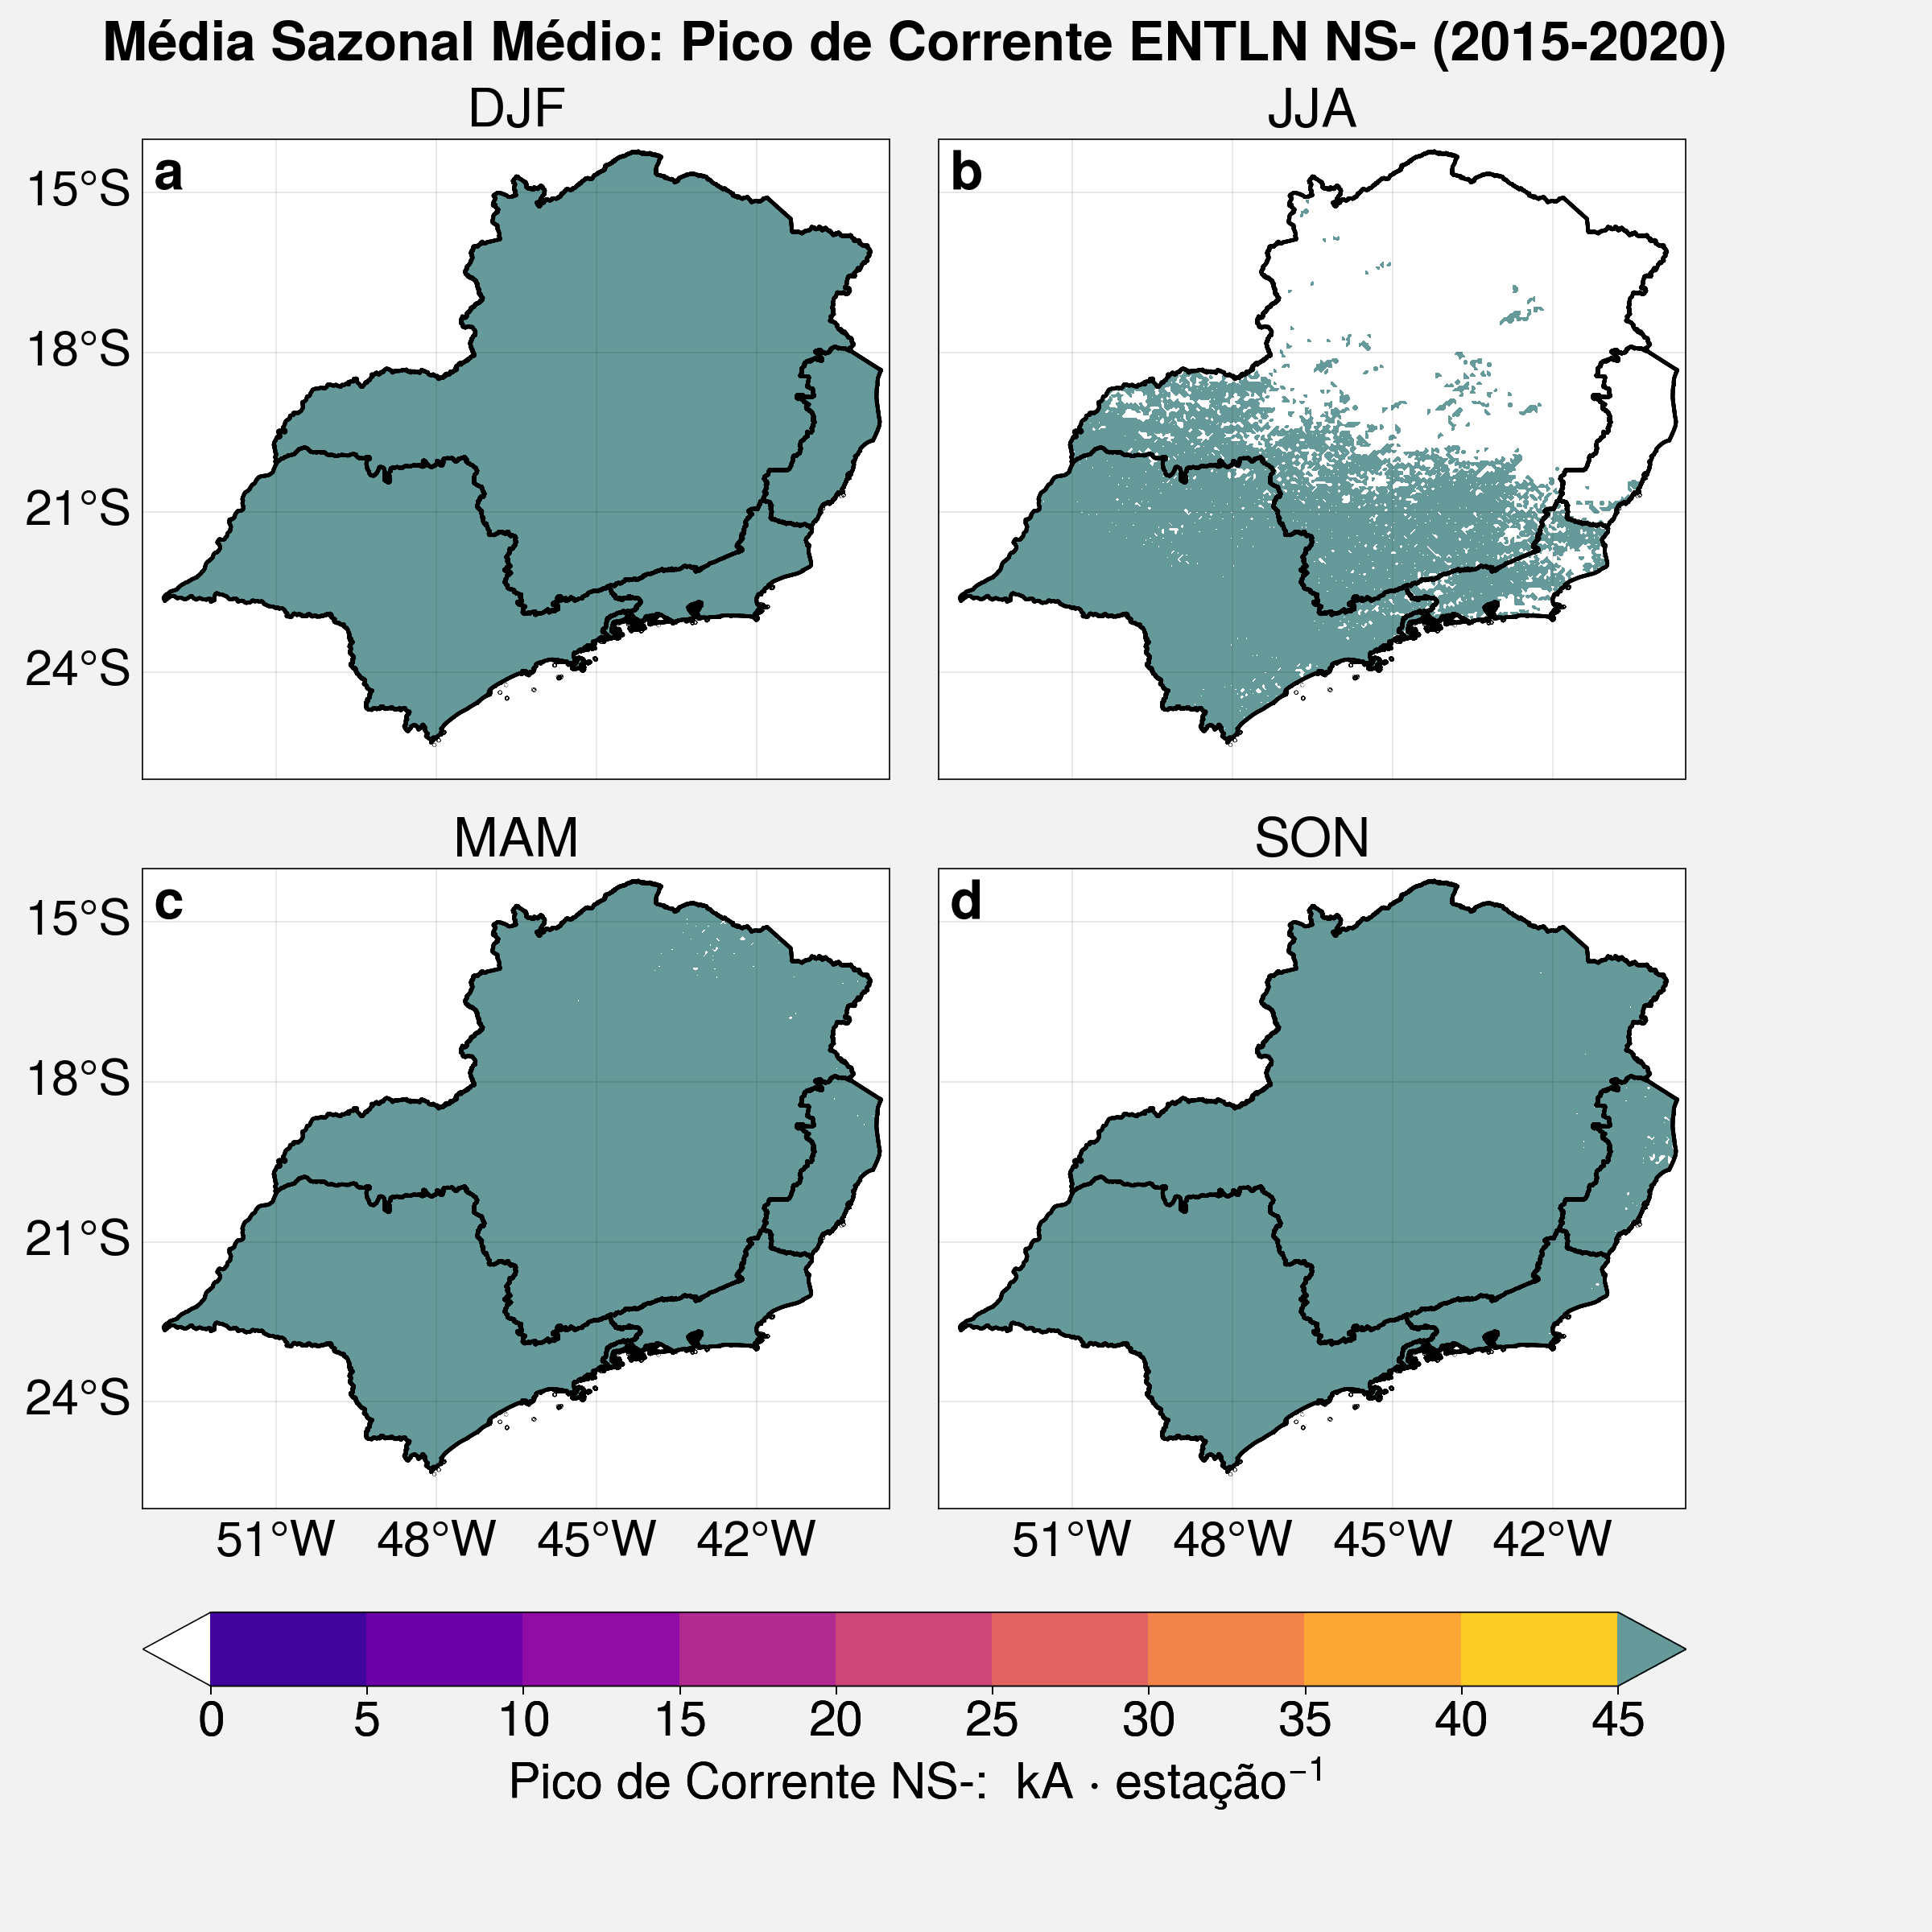

In [48]:
# Plotando a figura
matplotlib.rcParams.update({'font.size':22})  # seta o tamanho da fonte

# chama a figura
fig, ax = plot.subplots(figsize=(12,12), nrows=2, ncols=2, bottom='5em', right='5em',
                        sharex = False, sharey = False, proj='pcarree')
  
# configuração do plot
ax.format(coast=False, borders=True, innerborders=False, latlines=3, lonlines=3,
          latlim=(latN, latS), lonlim=(lonW, lonE), suptitle=f'Média Sazonal Médio: Pico de Corrente ENTLN NS- (2015-2020)')

## looping nas estações do nao
for s in range(len(raios_cg_neg_season)):

    # plota  a variável em cada estação do ano
    map1 = ax[s].contourf(raios_cg_neg_season.lon, raios_cg_neg_season.lat, raios_cg_neg_season[s,:,:],
                          cmap=cpt_convert_corr, vmax= 45, vmin= 0,  extend='both')
    
    # título da figura
    ax[s].format(title=raios_cg_neg_season.season[s].values,abc = 1, abcloc='ul')

    # molda as lebels de lat e lon
    if(s == 0):ax[s].format(labels = [True, False, False, False])
    if(s == 1):ax[s].format(labels = [False, False, False, False])
    if(s == 2):ax[s].format(labels = [True, False, True, False])
    if(s == 3):ax[s].format(labels = [False, False, True, False])

    # plota contornos dos Estados
    evm_plot_by_state()

# plota a barra de cores
cbar = fig.colorbar(map1, loc='b',label='Pico de Corrente NS-:  kA ${\cdot}$ $estação^{-1}$')
cbar.set_ticks([0,5,10,15,20,25,30,35,40,45])

# mostra a figura na tela
plot.show()

# salva a figura
fig.savefig(f'{output}ns_neg_pc_media_sazonal_2015-2020.png', dpi=300)


## **MÉDIA MENSAL DE PICO DE CORRENTE**

Relâmpagos NS+

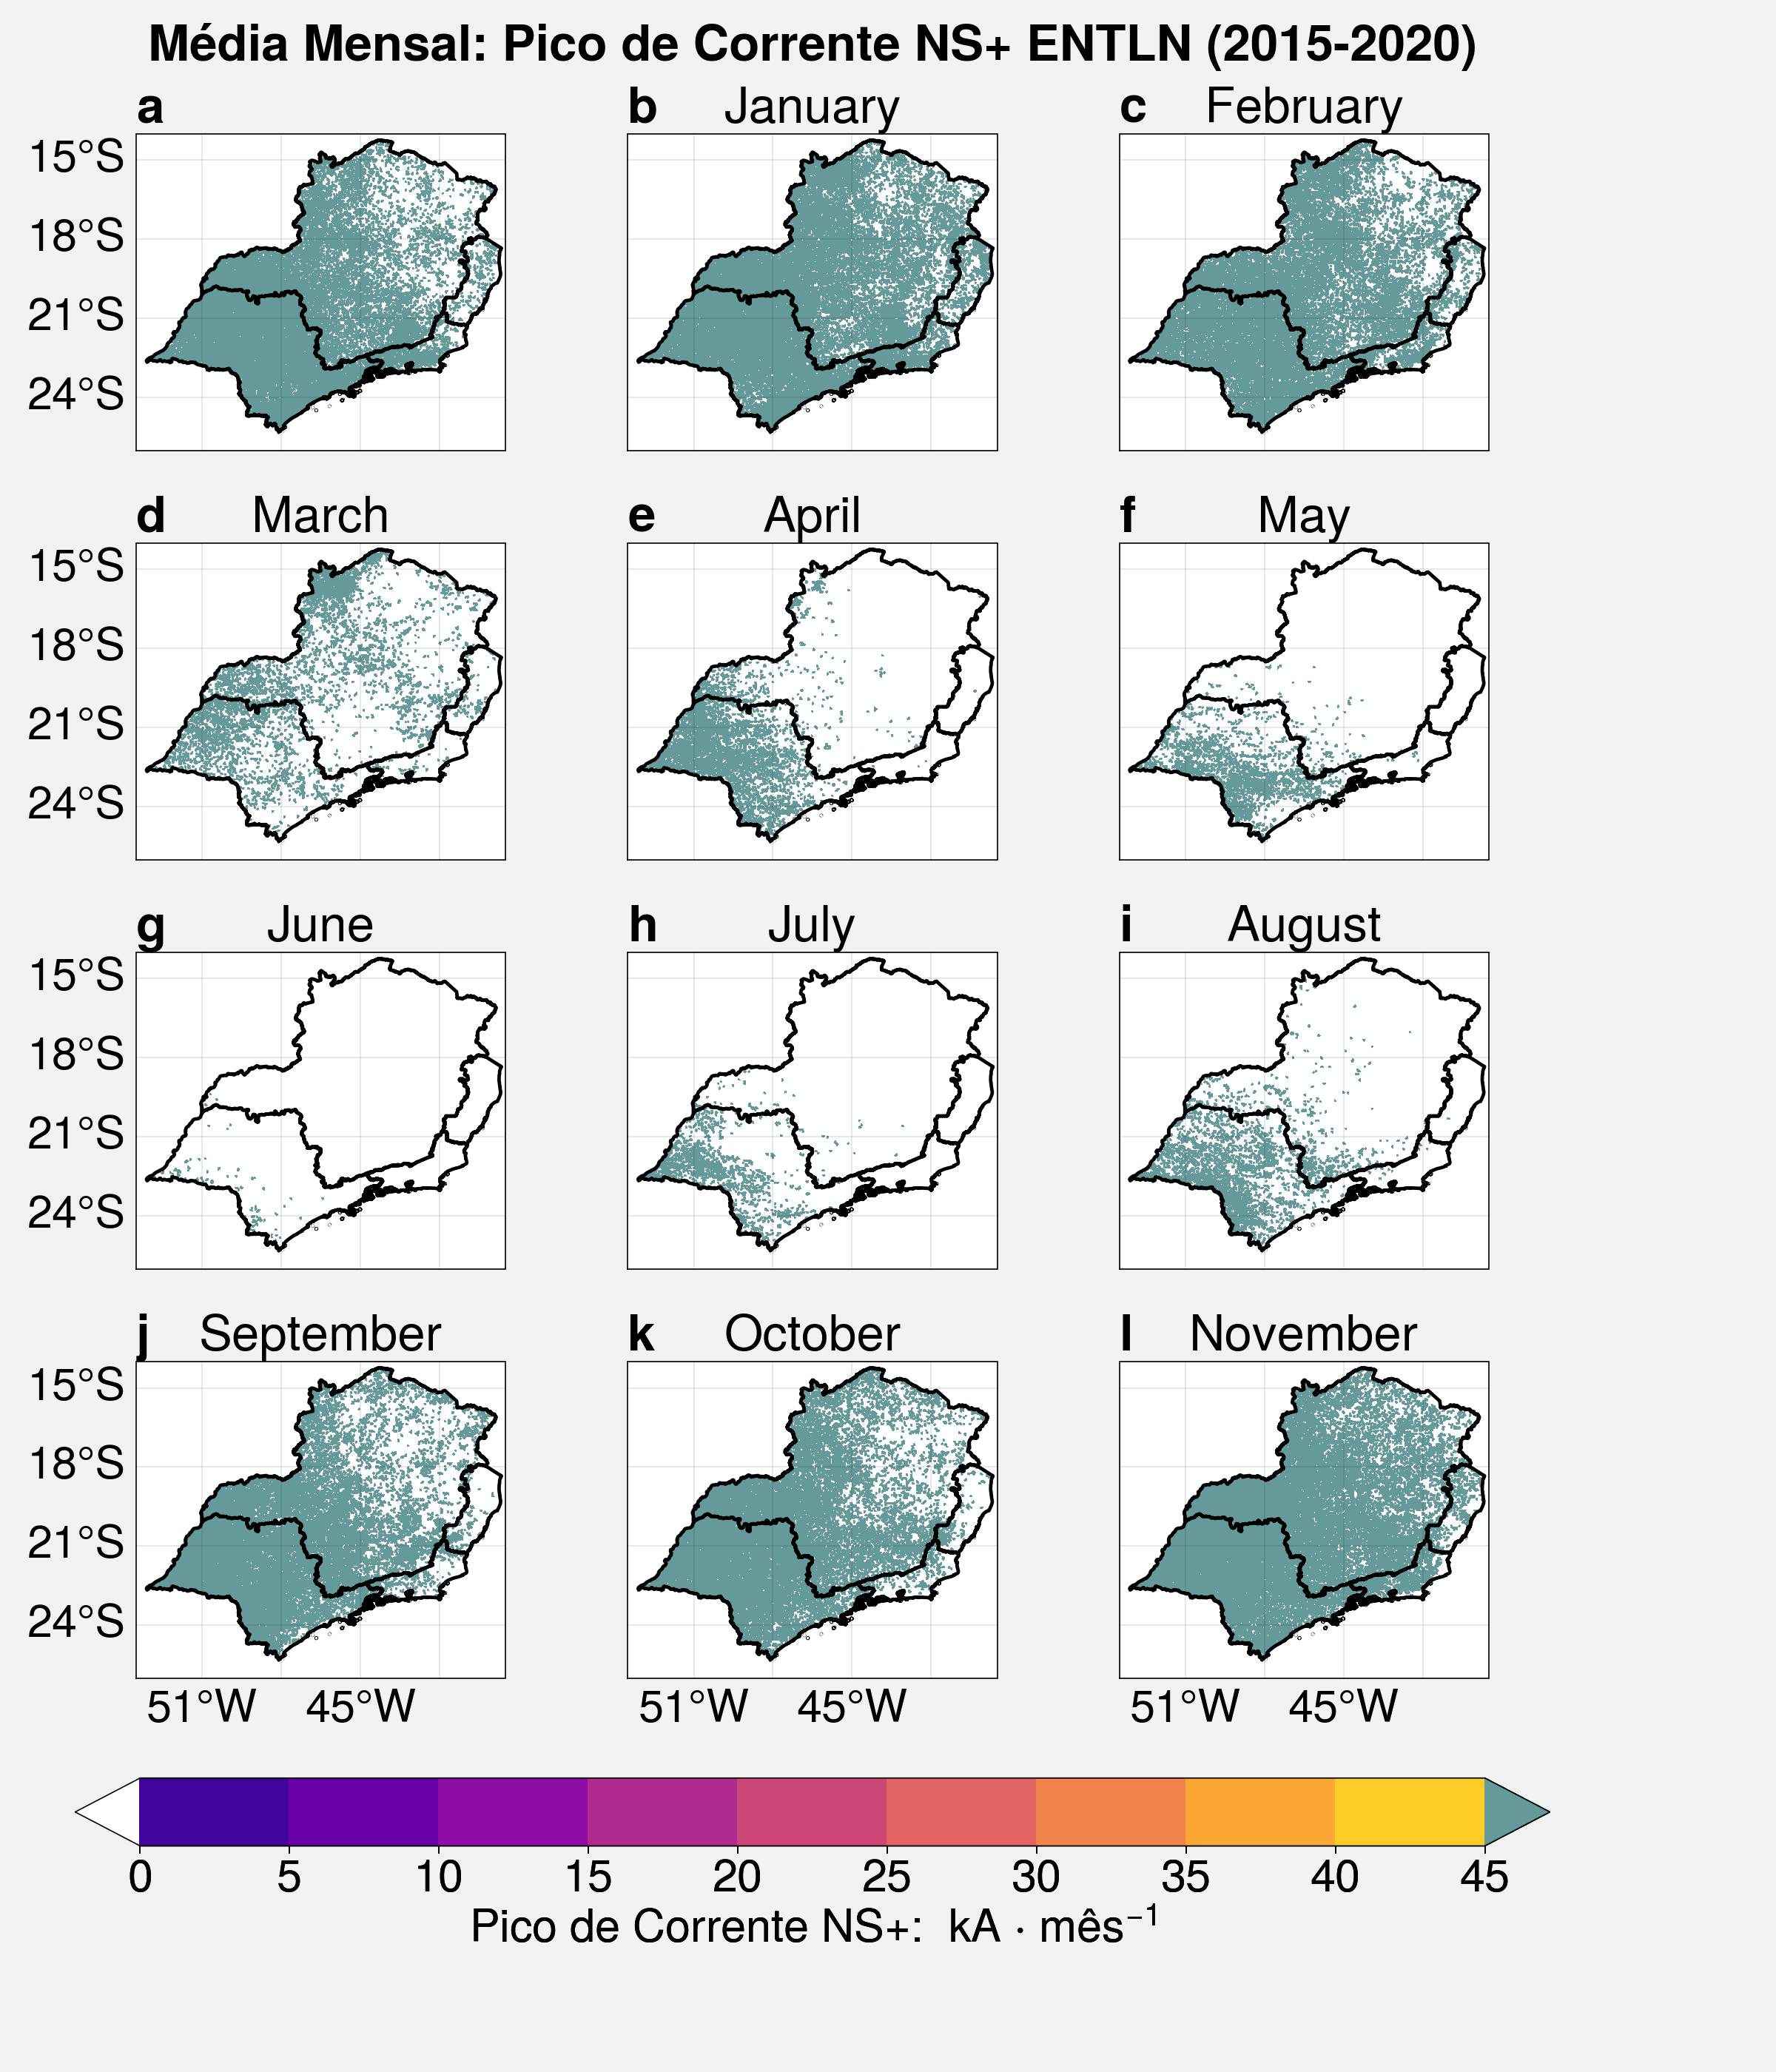

In [49]:
matplotlib.rcParams.update({'font.size':22})  # seta o tamanho da fonte

# cria a moldura da figura   
fig, ax = plot.subplots(figsize=(12,14), ncols=3, nrows=4, bottom='5em', right='5em',
                        sharex = False, sharey = False, proj='pcarree')

# formatação dos eixos
ax.format(coast=False, borders=True, innerborders=False, latlines=3, lonlines=3,
          latlim=(latN, latS), lonlim=(lonW, lonE), suptitle=f'Média Mensal: Pico de Corrente NS+ ENTLN (2015-2020)', 
          abc='(A)')

# plota estados
evm_plot_by_state()

# loop dos meses
for i in range(0, 12):             

  # molda as lebels de lat e lon
  if(i == 0):ax[i].format(labels = [True, False, False, False])
  if(i == 3):ax[i].format(labels = [True, False, False, False])
  if(i == 6):ax[i].format(labels = [True, False, False, False])
  if(i == 9):ax[i].format(labels = [True, False, True, False])
  if(i == 10):ax[i].format(labels = [False, False, True, False])
  if(i == 11):ax[i].format(labels = [False, False, True, False])

  # plota figura
  if i == 0: 
    map1 = ax[i].contourf(raios_cg_pos_mon[i,:,:]['lon'], raios_cg_pos_mon[i,:,:]['lat'], (raios_cg_pos_mon[i,:,:]), cmap=cpt_convert_corr, vmin=0,vmax=45,extend='both')
  else:
    ax[i].contourf(raios_cg_pos_mon[i,:,:]['lon'], raios_cg_pos_mon[i,:,:]['lat'], (raios_cg_pos_mon[i,:,:]), cmap=cpt_convert_corr, vmin=0,vmax= 45,extend='both') 
        
  # plota titulo de cada figura
  ax[i].format(title=calendar.month_name[int(i)])

# plota barra de cores da figura
cbar = fig.colorbar(map1, loc='b', label='Pico de Corrente NS+:  kA ${\cdot}$ $mês^{-1}$')
cbar.set_ticks([0,5,10,15,20,25,30,35,40,45])

# salva figura
fig.savefig(f'{output}ns_pos_pc_media_mensal_2015-2020.png', dpi=300)


Relâmpagos NS-

In [ ]:
matplotlib.rcParams.update({'font.size':22})  # seta o tamanho da fonte

# cria a moldura da figura   
fig, ax = plot.subplots(figsize=(12,14), ncols=3, nrows=4, bottom='5em', right='5em',
                        sharex = False, sharey = False, proj='pcarree')

# formatação dos eixos
ax.format(coast=False, borders=True, innerborders=False, latlines=3, lonlines=3,
          latlim=(latN, latS), lonlim=(lonW, lonE), suptitle=f'Média Mensa: Pico de Corrente NS- ENTLN (2015-2020)', 
          abc='(A)')

# plota estados
evm_plot_by_state()

# loop dos meses
for i in range(0, 12):                  

  # molda as lebels de lat e lon
  if(i == 0):ax[i].format(labels = [True, False, False, False])
  if(i == 3):ax[i].format(labels = [True, False, False, False])
  if(i == 6):ax[i].format(labels = [True, False, False, False])
  if(i == 9):ax[i].format(labels = [True, False, True, False])
  if(i == 10):ax[i].format(labels = [False, False, True, False])
  if(i == 11):ax[i].format(labels = [False, False, True, False])

  # plota figura
  if i == 0: 
    map1 = ax[i].contourf(raios_cg_neg_mon[i,:,:]['lon'], raios_cg_neg_mon[i,:,:]['lat'], (raios_cg_neg_mon[i,:,:]), cmap=cpt_convert_corr, vmin=0,vmax=45,extend='both')
  else:
    ax[i].contourf(raios_cg_neg_mon[i,:,:]['lon'], raios_cg_neg_mon[i,:,:]['lat'], (raios_cg_neg_mon[i,:,:]), cmap=cpt_convert_corr, vmin=0,vmax= 45,extend='both') 
        
  # plota titulo de cada figura
  ax[i].format(title=calendar.month_name[int(i)])

# plota barra de cores da figura
cbar = fig.colorbar(map1, loc='b', label='Pico de Corrente NS-:  kA ${\cdot}$ $mês^{-1}$')
cbar.set_ticks([0,5,10,15,20,25,30,35,40,45])

# salva figura
fig.savefig(f'{output}ns_neg_pc_media_mensal_2015-2020.png', dpi=300)
